In [1]:
from pathlib import Path

from dynamic_fusion.utils.dataset import CocoTestDataset

dataset_path = Path('..', 'data', 'interim', 'coco', 'train', '2subbins')


metrics_temporal_scale = []
spatial_scale = 1
temporal_scale = 1
for spatial_scale in range(1,4):
    dataset = CocoTestDataset(dataset_path, (spatial_scale, spatial_scale), threshold=1.3)

/home/davton/.local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import einops


def get_per_frames_and_per_sequences(discretized_events, bin_size: float):
    event_count_per_frame = einops.reduce(discretized_events, "T B X Y -> T X Y", 'sum')
    event_count_per_pixel_per_frame = einops.reduce(event_count_per_frame, "T X Y -> T", 'mean')
    event_count_per_pixel_per_second = event_count_per_pixel_per_frame / bin_size
    return event_count_per_pixel_per_second, einops.reduce(event_count_per_pixel_per_second, "T -> 1", 'mean')

In [3]:
import einops

bin_size = 0.2 # CONFIRMED

event_count_per_pixel_per_second_frames = []
event_count_per_pixel_per_second_sequences = []

downscaled_event_count_per_pixel_per_second_frames = []
downscaled_event_count_per_pixel_per_second_sequences = []


for i_sample in range(3):
    discretized_events = dataset[i_sample][7]
    frame_mean, sequence_mean = get_per_frames_and_per_sequences(discretized_events, bin_size)

    event_count_per_pixel_per_second_frames.append(frame_mean)
    event_count_per_pixel_per_second_sequences.append(sequence_mean)
    
    downscaled_discretized_events = dataset[i_sample][3]
    downscaled_frame_mean, downscaled_sequence_mean = get_per_frames_and_per_sequences(downscaled_discretized_events, bin_size)

    downscaled_event_count_per_pixel_per_second_frames.append(downscaled_frame_mean)
    downscaled_event_count_per_pixel_per_second_sequences.append(downscaled_sequence_mean)


In [8]:
event_count_per_frame = einops.reduce(discretized_events, "T B X Y -> T X Y", 'sum')
event_count_per_pixel_per_frame = einops.reduce(event_count_per_frame, "T X Y -> T", 'mean')

tensor([0.1089, 0.1318, 0.1359, 0.1353, 0.1324, 0.1296, 0.1338, 0.1326, 0.1302,
        0.1288, 0.1245, 0.1249, 0.1228, 0.1198, 0.1198, 0.1200, 0.1154, 0.1166,
        0.1161, 0.1098, 0.1105, 0.1103, 0.1098, 0.1067, 0.1072, 0.1062, 0.1043,
        0.1047, 0.1019, 0.1050, 0.1043, 0.0975, 0.1008, 0.1029, 0.0967, 0.0954,
        0.0966, 0.0936, 0.0975, 0.0928, 0.0921, 0.0928, 0.0917, 0.0922, 0.0903,
        0.0896, 0.0901, 0.0897, 0.0898, 0.0894, 0.0362, 0.0511, 0.0607, 0.0657,
        0.0663, 0.0693, 0.0718, 0.0714, 0.0743, 0.0751, 0.0740, 0.0727, 0.0764,
        0.0783, 0.0752, 0.0789, 0.0766, 0.0791, 0.0781, 0.0761, 0.0812, 0.0811,
        0.0808, 0.0817, 0.0821, 0.0788, 0.0793, 0.0815, 0.0778, 0.0777, 0.0800,
        0.0781, 0.0811, 0.0774, 0.0768, 0.0777, 0.0781, 0.0816, 0.0784, 0.0772,
        0.0763, 0.0771, 0.0757, 0.0768, 0.0799, 0.0759, 0.0817, 0.0789, 0.0750,
        0.0770])

: 

In [68]:
import torch


per_frames = torch.concat(event_count_per_pixel_per_second_frames, dim=0)
per_sequences = torch.concat(event_count_per_pixel_per_second_sequences, dim=0)

downscaled_per_frames = torch.concat(downscaled_event_count_per_pixel_per_second_frames, dim=0)
downscaled_per_sequences = torch.concat(downscaled_event_count_per_pixel_per_second_sequences, dim=0)


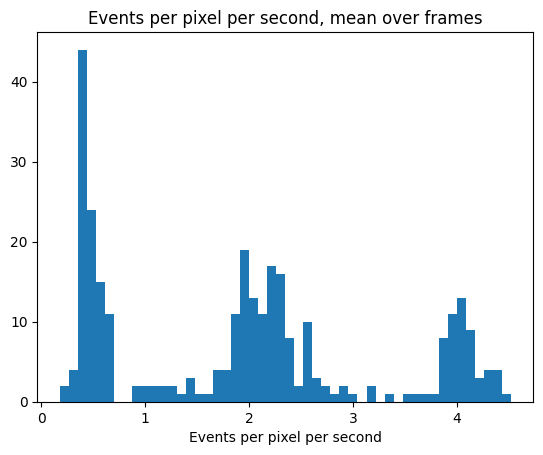

In [69]:
from matplotlib import pyplot as plt


plt.hist(per_frames, bins=50)
plt.title('Events per pixel per second, mean over frames')
plt.xlabel('Events per pixel per second')
plt.show()


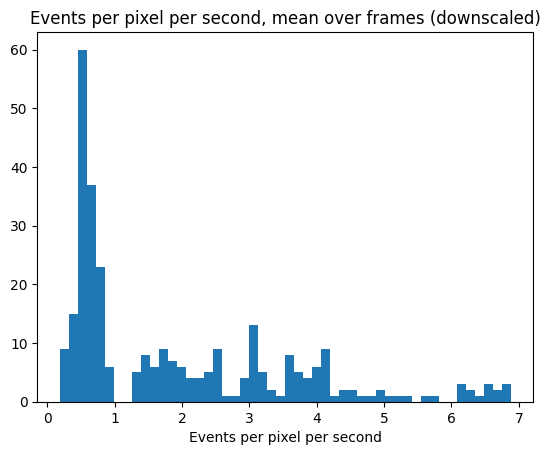

In [72]:
from matplotlib import pyplot as plt


plt.hist(downscaled_per_frames, bins=50)
plt.title('Events per pixel per second, mean over frames (downscaled)')
plt.xlabel('Events per pixel per second')
plt.show()


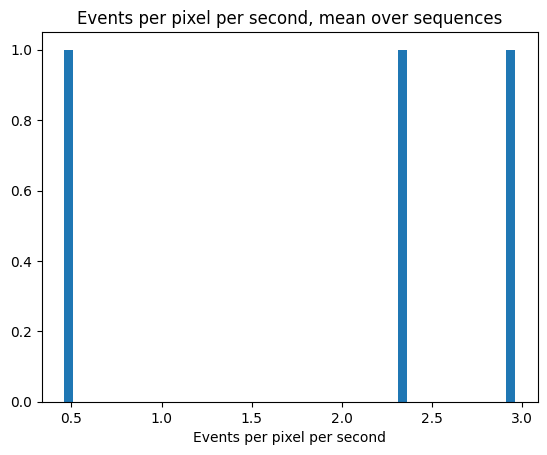

In [71]:
plt.hist(per_sequences, bins=50)
plt.title('Events per pixel per second, mean over sequences')
plt.xlabel('Events per pixel per second')
plt.show()


(array([ 1.,  0., 22., 29., 23.,  0.,  0., 15., 39., 21.]),
 array([0.33986408, 0.41226193, 0.48465982, 0.55705768, 0.62945557,
        0.70185339, 0.77425128, 0.84664917, 0.91904706, 0.99144489,
        1.06384277]),
 <BarContainer object of 10 artists>)

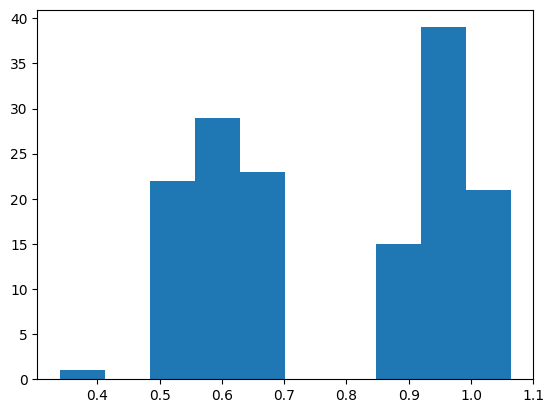

In [27]:
plt.hist(event_count_per_second_per_pixel)

(array([ 1.,  2., 25., 23., 18.,  7., 17., 27., 20., 10.]),
 array([0.18333927, 0.21755964, 0.25178   , 0.28600037, 0.32022074,
        0.35444111, 0.38866144, 0.42288181, 0.45710218, 0.49132255,
        0.52554291]),
 <BarContainer object of 10 artists>)

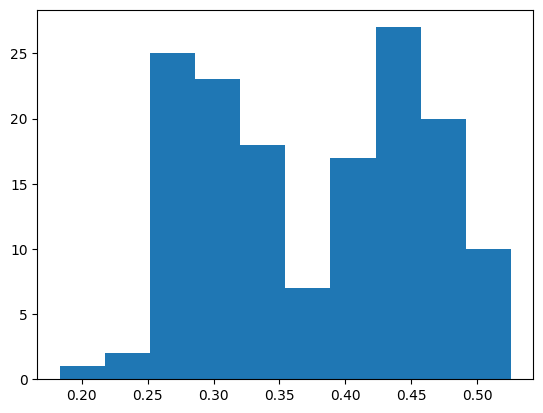

In [30]:
from matplotlib import pyplot as plt
plt.hist(event_count_per_second_per_pixel)